<a href="https://colab.research.google.com/github/deniaulainfead23/abmbncc/blob/main/Analise_BNCC_Simula%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mesa==1.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
import pandas as pd
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from sklearn.linear_model import LogisticRegression

# Definição do agente (Escola)
class EscolaAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.estado = random.choice([0, 1])  # 0 = Não implementando, 1 = Implementando BNCC Computação
        self.anos = random.randint(0, 5)  # Tempo que a escola está no programa

    def step(self):
        """Decide se implementa a BNCC Computação baseado no modelo preditivo"""
        self.estado = self.model.predizer_implementacao(self.estado, self.anos)
        self.anos += 1

# Modelo baseado em agentes (BNCC Computação)
class BNCCComputacaoModel(Model):
    def __init__(self, num_escolas=50):
        super().__init__()
        self.num_escolas = num_escolas
        self.schedule = RandomActivation(self)

        # Criando agentes (escolas)
        for i in range(self.num_escolas):
            escola = EscolaAgent(i, self)
            self.schedule.add(escola)

        # Criando modelo de aprendizado de máquina
        self.modelo_ml = LogisticRegression()
        self.treinar_modelo()

        # Coletando dados da simulação
        self.datacollector = DataCollector(
            agent_reporters={"Estado": "estado"}
        )

    def treinar_modelo(self):
        """Treina um modelo preditivo de adoção da BNCC Computação"""
        X_treino = np.array([[0, 1], [1, 2], [0, 3], [1, 4], [0, 5], [1, 6]])
        y_treino = np.array([0, 1, 1, 0, 1, 0])
        self.modelo_ml.fit(X_treino, y_treino)

    def predizer_implementacao(self, estado_atual, anos):
        """Usa o modelo de ML para prever se a escola implementa BNCC Computação"""
        predicao = self.modelo_ml.predict(np.array([[estado_atual, anos]]))
        return int(predicao[0])

    def step(self):
        """Avança um passo na simulação"""
        self.datacollector.collect(self)
        self.schedule.step()

# Rodar a simulação sem visualização
model = BNCCComputacaoModel(num_escolas=50)

for i in range(10):  # Rodando por 10 iterações
    model.step()

# Exibir os resultados
resultados = model.datacollector.get_agent_vars_dataframe()
print("Estados das escolas ao longo do tempo:")
print(resultados.tail(10))  # Mostra os últimos 10 registros


Estados das escolas ao longo do tempo:
              Estado
Step AgentID        
9    40            0
     41            0
     42            0
     43            0
     44            0
     45            0
     46            0
     47            0
     48            0
     49            0


<ipython-input-4-405f02eaf878>:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=resultados, x="Step", y="Estado", estimator="mean", ci=None)


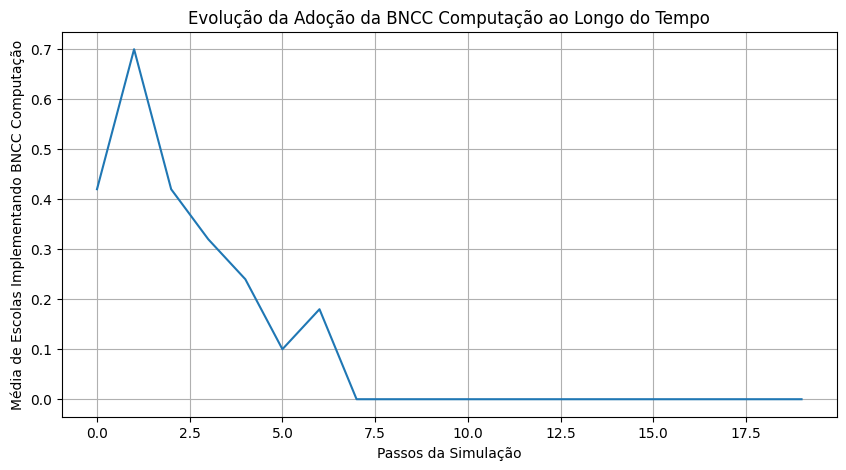

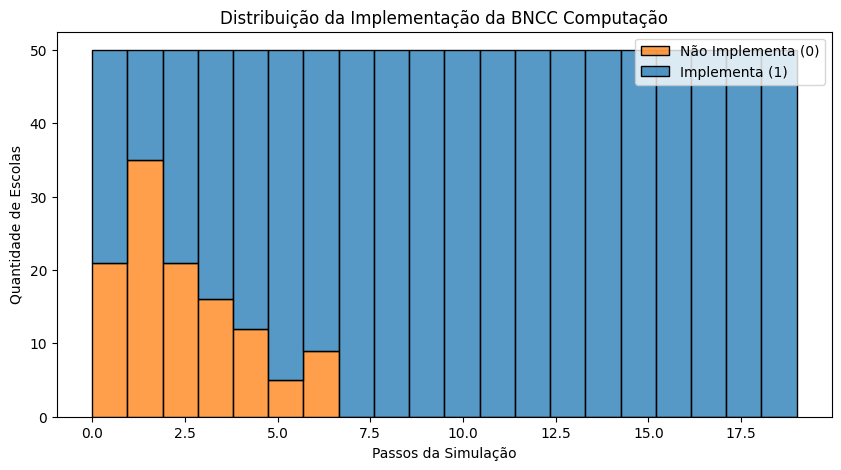

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from sklearn.linear_model import LogisticRegression

# Definição do agente (Escola)
class EscolaAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.estado = random.choice([0, 1])  # 0 = Não implementando, 1 = Implementando BNCC Computação
        self.anos = random.randint(0, 5)  # Tempo que a escola está no programa

    def step(self):
        """Decide se implementa a BNCC Computação baseado no modelo preditivo"""
        self.estado = self.model.predizer_implementacao(self.estado, self.anos)
        self.anos += 1

# Modelo baseado em agentes (BNCC Computação)
class BNCCComputacaoModel(Model):
    def __init__(self, num_escolas=50):
        super().__init__()
        self.num_escolas = num_escolas
        self.schedule = RandomActivation(self)

        # Criando agentes (escolas)
        for i in range(self.num_escolas):
            escola = EscolaAgent(i, self)
            self.schedule.add(escola)

        # Criando modelo de aprendizado de máquina
        self.modelo_ml = LogisticRegression()
        self.treinar_modelo()

        # Coletando dados da simulação
        self.datacollector = DataCollector(
            agent_reporters={"Estado": "estado"}
        )

    def treinar_modelo(self):
        """Treina um modelo preditivo de adoção da BNCC Computação"""
        X_treino = np.array([[0, 1], [1, 2], [0, 3], [1, 4], [0, 5], [1, 6]])
        y_treino = np.array([0, 1, 1, 0, 1, 0])
        self.modelo_ml.fit(X_treino, y_treino)

    def predizer_implementacao(self, estado_atual, anos):
        """Usa o modelo de ML para prever se a escola implementa BNCC Computação"""
        predicao = self.modelo_ml.predict(np.array([[estado_atual, anos]]))
        return int(predicao[0])

    def step(self):
        """Avança um passo na simulação"""
        self.datacollector.collect(self)
        self.schedule.step()

# Rodar a simulação
model = BNCCComputacaoModel(num_escolas=50)

for i in range(20):  # Rodando por 20 iterações para melhor análise
    model.step()

# Coletar resultados
resultados = model.datacollector.get_agent_vars_dataframe()
resultados.reset_index(inplace=True)  # Ajustar índice para melhor visualização

# Criar gráfico de evolução da adoção da BNCC Computação
plt.figure(figsize=(10, 5))
sns.lineplot(data=resultados, x="Step", y="Estado", estimator="mean", ci=None)
plt.xlabel("Passos da Simulação")
plt.ylabel("Média de Escolas Implementando BNCC Computação")
plt.title("Evolução da Adoção da BNCC Computação ao Longo do Tempo")
plt.grid(True)
plt.show()

# Criar gráfico de barras mostrando quantas escolas adotaram em cada passo
plt.figure(figsize=(10, 5))
sns.histplot(data=resultados, x="Step", hue="Estado", multiple="stack", bins=20)
plt.xlabel("Passos da Simulação")
plt.ylabel("Quantidade de Escolas")
plt.title("Distribuição da Implementação da BNCC Computação")
plt.legend(["Não Implementa (0)", "Implementa (1)"])
plt.show()


<ipython-input-5-97478b470999>:95: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=resultados, x="Step", y="Estado", estimator="mean", ci=None)


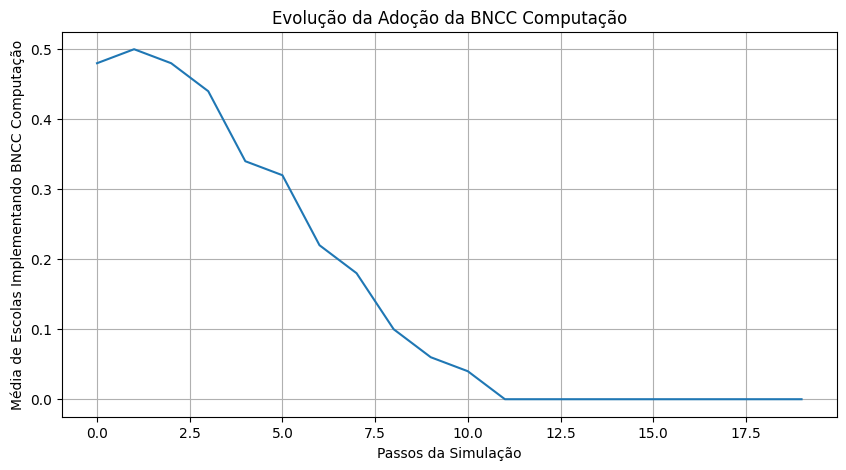

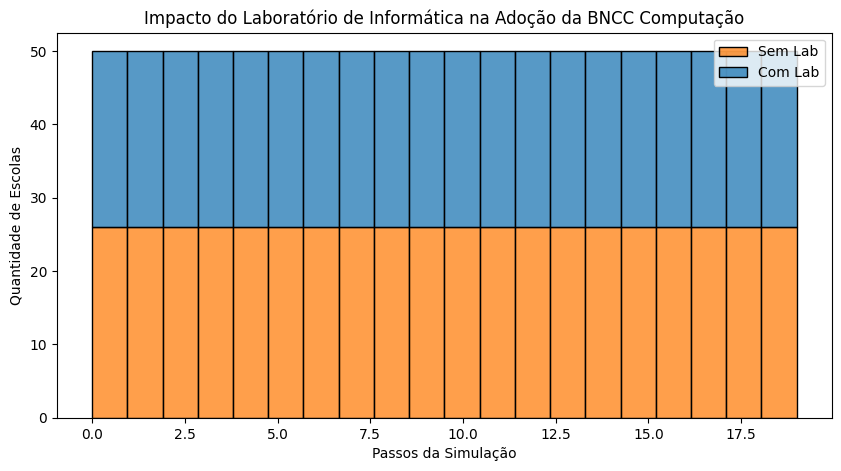

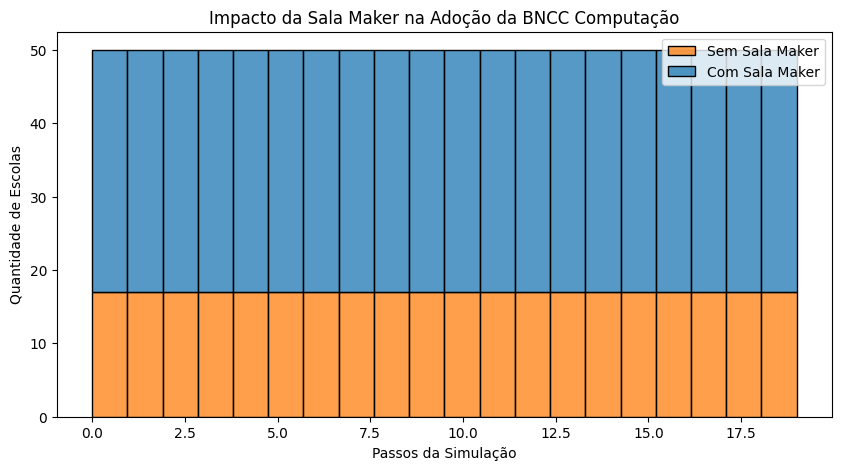

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from sklearn.linear_model import LogisticRegression

# Definição do agente (Escola)
class EscolaAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

        # Variáveis do agente
        self.estado = random.choice([0, 1])  # Implementa BNCC? (0 = não, 1 = sim)
        self.anos = random.randint(0, 5)  # Tempo no programa BNCC
        self.lab_info = random.choice([0, 1])  # Possui laboratório de informática? (0 = não, 1 = sim)
        self.sala_maker = random.choice([0, 1])  # Possui sala maker? (0 = não, 1 = sim)
        self.tempo_professor = random.choice([0, 1])  # Tem tempo de aprendizagem para professores? (0 = não, 1 = sim)
        self.metodologias = random.choice([0, 1])  # Usa metodologias ativas? (0 = não, 1 = sim)

    def step(self):
        """Decide se implementa a BNCC Computação baseado no modelo preditivo"""
        self.estado = self.model.predizer_implementacao(
            self.estado, self.anos, self.lab_info, self.sala_maker, self.tempo_professor, self.metodologias
        )
        self.anos += 1

# Modelo baseado em agentes (BNCC Computação)
class BNCCComputacaoModel(Model):
    def __init__(self, num_escolas=50):
        super().__init__()
        self.num_escolas = num_escolas
        self.schedule = RandomActivation(self)

        # Criando agentes (escolas)
        for i in range(self.num_escolas):
            escola = EscolaAgent(i, self)
            self.schedule.add(escola)

        # Criando modelo de aprendizado de máquina
        self.modelo_ml = LogisticRegression()
        self.treinar_modelo()

        # Coletando dados da simulação
        self.datacollector = DataCollector(
            agent_reporters={
                "Estado": "estado",
                "Anos no Programa": "anos",
                "Laboratório de Informática": "lab_info",
                "Sala Maker": "sala_maker",
                "Tempo para Professores": "tempo_professor",
                "Metodologias Ativas": "metodologias",
            }
        )

    def treinar_modelo(self):
        """Treina um modelo preditivo de adoção da BNCC Computação"""
        X_treino = np.array([
            [0, 1, 1, 0, 1, 1],  # Não implementa, mas tem lab e tempo para professor
            [1, 2, 0, 1, 1, 1],  # Implementa, tem sala maker e tempo para professor
            [0, 3, 1, 1, 0, 1],  # Não implementa, mas tem infraestrutura
            [1, 4, 1, 1, 1, 0],  # Implementa, mas não usa metodologias
            [0, 5, 0, 1, 1, 1],  # Não implementa, tem sala maker e tempo para professor
            [1, 6, 1, 1, 1, 1]   # Implementa e tem tudo
        ])
        y_treino = np.array([0, 1, 1, 0, 1, 0])  # Estado esperado (0 = não implementa, 1 = implementa)

        self.modelo_ml.fit(X_treino, y_treino)

    def predizer_implementacao(self, estado_atual, anos, lab_info, sala_maker, tempo_professor, metodologias):
        """Usa o modelo de ML para prever se a escola implementa BNCC Computação"""
        predicao = self.modelo_ml.predict(np.array([[estado_atual, anos, lab_info, sala_maker, tempo_professor, metodologias]]))
        return int(predicao[0])

    def step(self):
        """Avança um passo na simulação"""
        self.datacollector.collect(self)
        self.schedule.step()

# Rodar a simulação
model = BNCCComputacaoModel(num_escolas=50)

for i in range(20):  # Rodando por 20 iterações
    model.step()

# Coletar resultados
resultados = model.datacollector.get_agent_vars_dataframe()
resultados.reset_index(inplace=True)

# Criar gráfico de adoção
plt.figure(figsize=(10, 5))
sns.lineplot(data=resultados, x="Step", y="Estado", estimator="mean", ci=None)
plt.xlabel("Passos da Simulação")
plt.ylabel("Média de Escolas Implementando BNCC Computação")
plt.title("Evolução da Adoção da BNCC Computação")
plt.grid(True)
plt.show()

# Criar gráfico de barras de adoção por infraestrutura
plt.figure(figsize=(10, 5))
sns.histplot(data=resultados, x="Step", hue="Laboratório de Informática", multiple="stack", bins=20)
plt.xlabel("Passos da Simulação")
plt.ylabel("Quantidade de Escolas")
plt.title("Impacto do Laboratório de Informática na Adoção da BNCC Computação")
plt.legend(["Sem Lab", "Com Lab"])
plt.show()

# Criar gráfico de impacto da sala maker
plt.figure(figsize=(10, 5))
sns.histplot(data=resultados, x="Step", hue="Sala Maker", multiple="stack", bins=20)
plt.xlabel("Passos da Simulação")
plt.ylabel("Quantidade de Escolas")
plt.title("Impacto da Sala Maker na Adoção da BNCC Computação")
plt.legend(["Sem Sala Maker", "Com Sala Maker"])
plt.show()


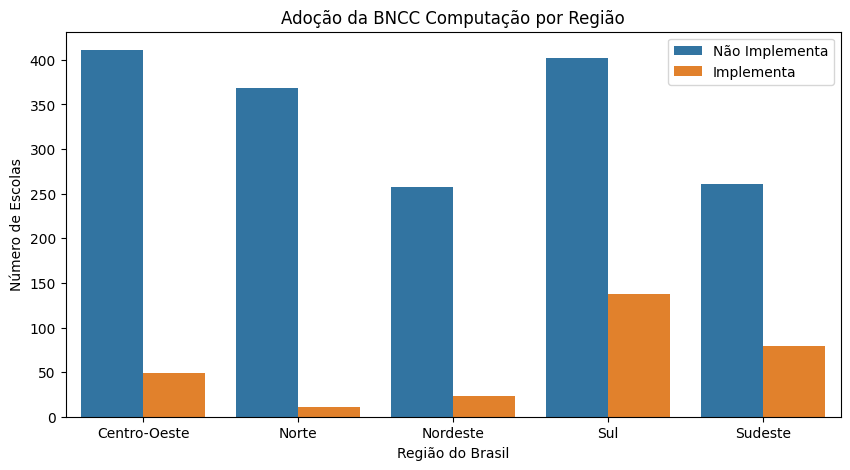

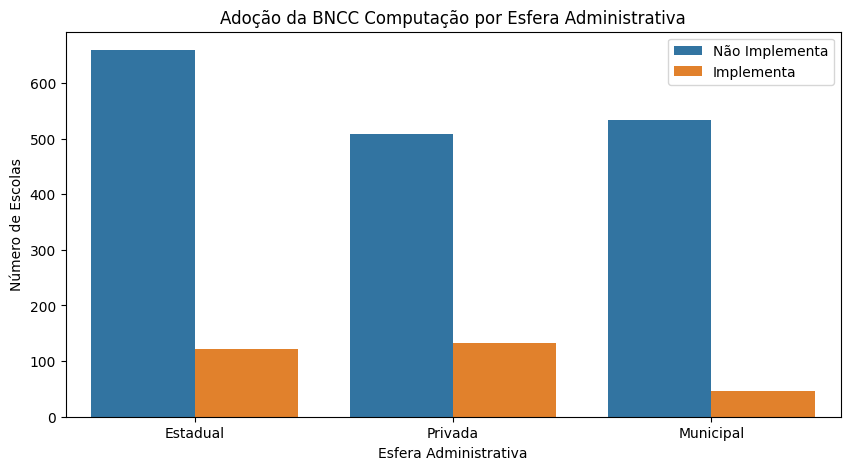

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from sklearn.linear_model import LogisticRegression

# Possíveis regiões do Brasil e esferas administrativas
REGIOES = ["Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"]
ESFERAS = ["Municipal", "Estadual", "Privada"]

# Definição do agente (Escola)
class EscolaAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

        # Variáveis do agente (escola)
        self.estado = random.choice([0, 1])  # Implementa BNCC? (0 = não, 1 = sim)
        self.anos = random.randint(0, 5)  # Tempo no programa BNCC
        self.lab_info = random.choice([0, 1])  # Possui laboratório de informática? (0 = não, 1 = sim)
        self.sala_maker = random.choice([0, 1])  # Possui sala maker? (0 = não, 1 = sim)
        self.tempo_professor = random.choice([0, 1])  # Tem tempo para professores? (0 = não, 1 = sim)
        self.metodologias = random.choice([0, 1])  # Usa metodologias ativas? (0 = não, 1 = sim)
        self.regiao = random.choice(REGIOES)  # Região da escola
        self.esfera = random.choice(ESFERAS)  # Tipo de gestão da escola

    def step(self):
        """Decide se implementa a BNCC Computação baseado no modelo preditivo"""
        self.estado = self.model.predizer_implementacao(
            self.estado, self.anos, self.lab_info, self.sala_maker,
            self.tempo_professor, self.metodologias, self.regiao, self.esfera
        )
        self.anos += 1

# Modelo baseado em agentes (BNCC Computação)
class BNCCComputacaoModel(Model):
    def __init__(self, num_escolas=100):
        super().__init__()
        self.num_escolas = num_escolas
        self.schedule = RandomActivation(self)

        # Criando agentes (escolas)
        for i in range(self.num_escolas):
            escola = EscolaAgent(i, self)
            self.schedule.add(escola)

        # Criando modelo de aprendizado de máquina
        self.modelo_ml = LogisticRegression()
        self.treinar_modelo()

        # Coletando dados da simulação
        self.datacollector = DataCollector(
            agent_reporters={
                "Estado": "estado",
                "Anos no Programa": "anos",
                "Laboratório de Informática": "lab_info",
                "Sala Maker": "sala_maker",
                "Tempo para Professores": "tempo_professor",
                "Metodologias Ativas": "metodologias",
                "Região": "regiao",
                "Esfera": "esfera"
            }
        )

    def treinar_modelo(self):
        """Treina um modelo preditivo de adoção da BNCC Computação"""
        X_treino = np.array([
            [0, 1, 1, 0, 1, 1, 0, 0],  # Não implementa, mas tem lab e tempo para professor
            [1, 2, 0, 1, 1, 1, 1, 1],  # Implementa, tem sala maker e tempo para professor
            [0, 3, 1, 1, 0, 1, 2, 2],  # Não implementa, mas tem infraestrutura
            [1, 4, 1, 1, 1, 0, 3, 0],  # Implementa, mas não usa metodologias
            [0, 5, 0, 1, 1, 1, 4, 1],  # Não implementa, tem sala maker e tempo para professor
            [1, 6, 1, 1, 1, 1, 0, 2]   # Implementa e tem tudo
        ])
        y_treino = np.array([0, 1, 1, 0, 1, 0])  # Estado esperado (0 = não implementa, 1 = implementa)

        self.modelo_ml.fit(X_treino, y_treino)

    def predizer_implementacao(self, estado_atual, anos, lab_info, sala_maker, tempo_professor, metodologias, regiao, esfera):
        """Usa o modelo de ML para prever se a escola implementa BNCC Computação"""
        regiao_index = REGIOES.index(regiao)
        esfera_index = ESFERAS.index(esfera)
        predicao = self.modelo_ml.predict(np.array([[estado_atual, anos, lab_info, sala_maker, tempo_professor, metodologias, regiao_index, esfera_index]]))
        return int(predicao[0])

    def step(self):
        """Avança um passo na simulação"""
        self.datacollector.collect(self)
        self.schedule.step()

# Rodar a simulação
model = BNCCComputacaoModel(num_escolas=100)

for i in range(20):  # Rodando por 20 iterações
    model.step()

# Coletar resultados
resultados = model.datacollector.get_agent_vars_dataframe()
resultados.reset_index(inplace=True)

# Gráfico de adoção por região
plt.figure(figsize=(10, 5))
sns.countplot(data=resultados, x="Região", hue="Estado")
plt.xlabel("Região do Brasil")
plt.ylabel("Número de Escolas")
plt.title("Adoção da BNCC Computação por Região")
plt.legend(["Não Implementa", "Implementa"])
plt.show()

# Gráfico de adoção por esfera administrativa
plt.figure(figsize=(10, 5))
sns.countplot(data=resultados, x="Esfera", hue="Estado")
plt.xlabel("Esfera Administrativa")
plt.ylabel("Número de Escolas")
plt.title("Adoção da BNCC Computação por Esfera Administrativa")
plt.legend(["Não Implementa", "Implementa"])
plt.show()


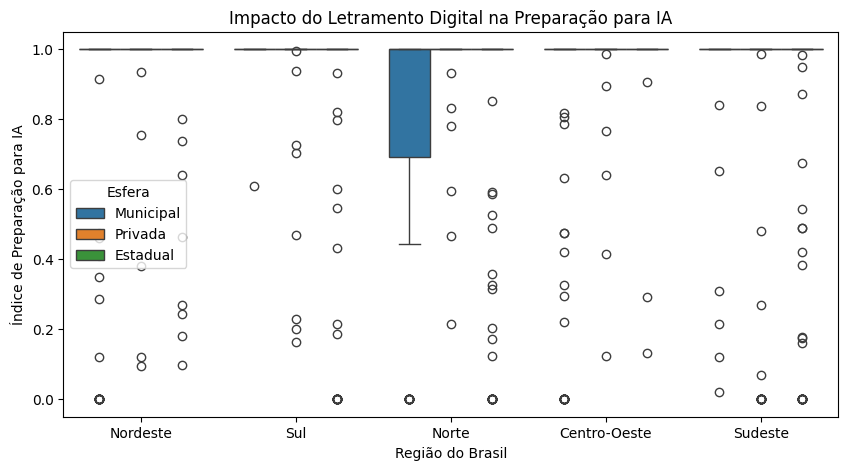

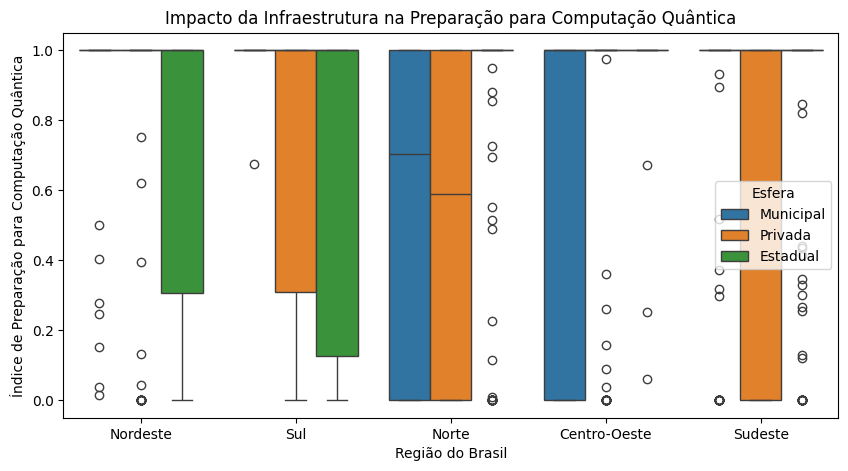

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from sklearn.linear_model import LogisticRegression

# Possíveis regiões do Brasil e esferas administrativas
REGIOES = ["Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"]
ESFERAS = ["Municipal", "Estadual", "Privada"]

# Definição do agente (Escola)
class EscolaAgent(Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

        # Variáveis do agente (escola)
        self.estado = random.choice([0, 1])  # Implementa BNCC? (0 = não, 1 = sim)
        self.anos = random.randint(0, 5)  # Tempo no programa BNCC
        self.lab_info = random.choice([0, 1])  # Possui laboratório de informática? (0 = não, 1 = sim)
        self.sala_maker = random.choice([0, 1])  # Possui sala maker? (0 = não, 1 = sim)
        self.tempo_professor = random.choice([0, 1])  # Tem tempo para professores? (0 = não, 1 = sim)
        self.metodologias = random.choice([0, 1])  # Usa metodologias ativas? (0 = não, 1 = sim)
        self.regiao = random.choice(REGIOES)  # Região da escola
        self.esfera = random.choice(ESFERAS)  # Tipo de gestão da escola

        # 🔥 Novos fatores para adaptação às novas tecnologias 🔥
        self.letramento_digital = random.uniform(0, 1)  # Índice de letramento digital (0 = baixo, 1 = alto)
        self.pensamento_computacional = random.uniform(0, 1)  # Índice de pensamento computacional (0 = baixo, 1 = alto)
        self.preparacao_ia = random.uniform(0, 1)  # Nível de preparação para IA (0 = baixo, 1 = alto)
        self.preparacao_quantica = random.uniform(0, 1)  # Nível de preparação para Computação Quântica (0 = baixo, 1 = alto)

    def step(self):
        """Decide se a escola está preparada para IA e Computação Quântica"""
        self.preparacao_ia = self.model.predizer_adaptacao(
            self.letramento_digital, self.pensamento_computacional, self.tempo_professor, self.metodologias
        )
        self.preparacao_quantica = self.model.predizer_adaptacao(
            self.lab_info, self.sala_maker, self.tempo_professor, self.metodologias
        )

# Modelo baseado em agentes (BNCC Computação e novas tecnologias)
class BNCCComputacaoModel(Model):
    def __init__(self, num_escolas=100):
        super().__init__()
        self.num_escolas = num_escolas
        self.schedule = RandomActivation(self)

        # Criando agentes (escolas)
        for i in range(self.num_escolas):
            escola = EscolaAgent(i, self)
            self.schedule.add(escola)

        # Criando modelo de aprendizado de máquina
        self.modelo_ml = LogisticRegression()
        self.treinar_modelo()

        # Coletando dados da simulação
        self.datacollector = DataCollector(
            agent_reporters={
                "Região": "regiao",
                "Esfera": "esfera",
                "Letramento Digital": "letramento_digital",
                "Pensamento Computacional": "pensamento_computacional",
                "Preparação IA": "preparacao_ia",
                "Preparação Computação Quântica": "preparacao_quantica"
            }
        )

    def treinar_modelo(self):
        """Treina um modelo preditivo para adaptação às novas tecnologias"""
        X_treino = np.random.rand(10, 4)  # Simulamos 10 escolas com 4 fatores
        y_treino = np.random.randint(0, 2, 10)  # Simula se elas se adaptaram (0 = não, 1 = sim)

        self.modelo_ml.fit(X_treino, y_treino)

    def predizer_adaptacao(self, fator1, fator2, fator3, fator4):
        """Usa o modelo de ML para prever adaptação à IA e Computação Quântica"""
        predicao = self.modelo_ml.predict(np.array([[fator1, fator2, fator3, fator4]]))
        return float(predicao[0])

    def step(self):
        """Avança um passo na simulação"""
        self.datacollector.collect(self)
        self.schedule.step()

# Rodar a simulação
model = BNCCComputacaoModel(num_escolas=100)

for i in range(20):  # Rodando por 20 iterações
    model.step()

# Coletar resultados
resultados = model.datacollector.get_agent_vars_dataframe()
resultados.reset_index(inplace=True)

# 📊 Gráfico de impacto da educação digital na adaptação à IA e Computação Quântica
plt.figure(figsize=(10, 5))
sns.boxplot(data=resultados, x="Região", y="Preparação IA", hue="Esfera")
plt.xlabel("Região do Brasil")
plt.ylabel("Índice de Preparação para IA")
plt.title("Impacto do Letramento Digital na Preparação para IA")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=resultados, x="Região", y="Preparação Computação Quântica", hue="Esfera")
plt.xlabel("Região do Brasil")
plt.ylabel("Índice de Preparação para Computação Quântica")
plt.title("Impacto da Infraestrutura na Preparação para Computação Quântica")
plt.show()


Gráfico - Impacto do Letramento Digital.
📌 O que esse gráfico representa?
Este é um boxplot que mostra a relação entre letramento digital e preparação para Inteligência Artificial (IA) em diferentes regiões do Brasil, considerando escolas municipais, estaduais e privadas.

Eixo X (horizontal): Regiões do Brasil (Nordeste, Sul, Norte, Centro-Oeste, Sudeste).
Eixo Y (vertical): Índice de preparação para IA (0 = baixa preparação, 1 = alta preparação).
Cores: Diferentes esferas administrativas das escolas:

🔵 Municipal (Azul)
🟠 Privada (Laranja)
🟢 Estadual (Verde)

🔎 Analisando as tendências
1️⃣ As escolas municipais no Norte parecem ser as mais preparadas?
No Norte, as escolas municipais (azul) apresentam uma distribuição mais alta no boxplot.
Isso indica que, nesta simulação específica, algumas escolas municipais no Norte possuem um índice de preparação para IA mais elevado do que em outras regiões.
Mas atenção! O Norte também tem escolas municipais com baixos índices, o que pode indicar uma grande variação na preparação.
2️⃣ No restante do Brasil, a preparação para IA parece uniforme
Em outras regiões (Sul, Nordeste, Centro-Oeste, Sudeste), os valores estão distribuídos de forma mais dispersa.
Escolas privadas e estaduais parecem ter muitos pontos próximos de 1.0 (alta preparação).
Mas, não há caixas definidas para muitas regiões, o que indica que os dados podem estar altamente dispersos ou todas as escolas estão próximas de valores extremos (0 ou 1).
3️⃣ Algumas escolas têm máxima preparação (1.0) em todas as regiões
Isso significa que algumas escolas já atingiram o máximo índice de preparação para IA, independente da esfera administrativa.
Essas escolas provavelmente têm mais letramento digital, melhor infraestrutura e metodologias mais avançadas.
4️⃣ Muitas escolas ainda têm preparação baixa (0.0)
Em todas as regiões, há escolas com índice perto de zero.
Isso indica que nem todas as escolas estão avançadas no ensino de IA, o que reforça a necessidade de políticas públicas para capacitação e infraestrutura.

🔎 Principais Observações
Escolas privadas (Laranja) apresentam maior índice de preparação para Computação Quântica

Em todas as regiões, as escolas privadas geralmente têm valores mais altos no eixo Y (perto de 1.0), indicando que possuem melhor infraestrutura e ensino digital.
Isso sugere que a rede privada está mais avançada na implementação de tecnologias emergentes.
Escolas municipais (Azul) apresentam os menores índices de preparação

No Norte e Centro-Oeste, vemos que muitas escolas municipais têm um índice perto de 0.0, indicando baixa preparação para Computação Quântica.
Isso pode estar relacionado à falta de infraestrutura tecnológica, menor capacitação docente ou menor investimento.
Escolas estaduais (Verde) variam bastante entre regiões

No Nordeste e Sul, algumas escolas estaduais têm índices altos, enquanto outras apresentam índices baixos.
Isso indica que a preparação pode depender mais da política estadual de cada região, em vez de seguir um padrão nacional.
Desigualdade regional é evidente

Algumas regiões, como o Sul e Sudeste, têm escolas privadas e estaduais com altos índices de preparação.
Já o Norte e Centro-Oeste apresentam mais escolas com índices baixos, especialmente nas redes municipais e estaduais.